In [ ]:
!pip install tensorflow

In [ ]:
# Sequential API to Create Models
from keras.models import Sequential

# Components to create a model
from keras.layers import Dense , Input

# Stochastic Gradient Desent Algorithm
from keras.optimizers import SGD

# keras already hosted MNIST dataset
from keras.datasets import mnist

# AN keras utility to binarize integers
from keras.utils import to_categorical

# An keras utility to visualize model graph
from keras.utils import plot_model

#Another ML library that has many utilities for image operations
import skimage

#one of the utility of skimage
from skimage.io import imshow

import matplotlib.pyplot as plt
import numpy as np

#Hyperparameters

In [ ]:
#whole datasets splits into batches
batch_size = 128

#Number of labels of our dataset
nb_classes = 10

#Number of times we want to train the model
nb_epoch = 10

#Load Data

In [ ]:
# load MNIST dataset
# Data split into two subset : Training and Test
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(len(X_train))
print(len(Y_train))

60000
60000


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
Y_train.shape

(60000,)

In [ ]:
X_test.shape


(10000, 28, 28)

#Visualize Data

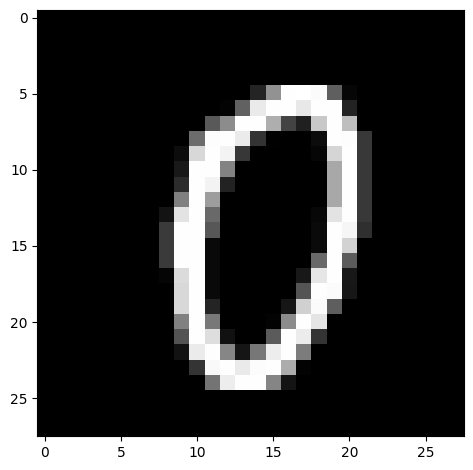

In [ ]:
randomimage=X_train[1000]
imshow(randomimage)

In [ ]:
print(randomimage)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  36 146 254 255
  251  95   6   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  97 234 254 254 232
  254 254  35   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  89 140 254 254 174  67  33
  200 254 190   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 108 253 254 235  51   

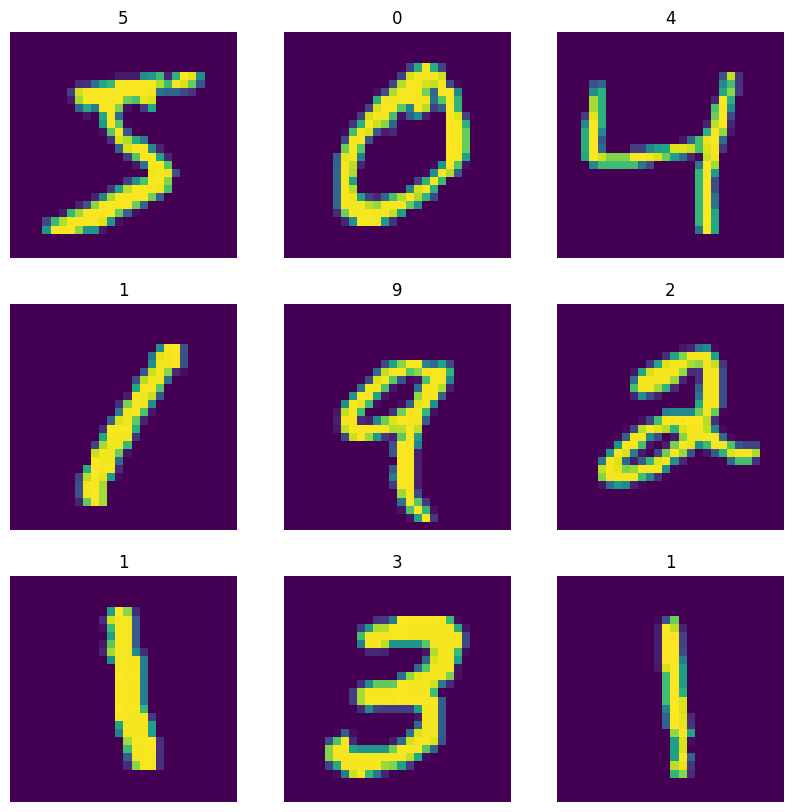

In [ ]:
#define figure size
plt.figure(figsize=(10,10))

for i in range(9):
  ax = plt.subplot(3,3,i+1)

  an_image = X_train[i]
  plt.imshow(an_image)
  plt.title(int(Y_train[i]))
  plt.axis("off")



#Reshape and Flatten Data

In [ ]:
print("shape of trainning data:",X_train.shape)
print("shape of trainning sample",X_train[0].shape)

shape of trainning data: (60000, 28, 28)
shape of trainning sample (28, 28)


In [ ]:
an_image=X_train[0]
print(an_image.shape)

#define new shape and flatten the image
new_shape = 28*28
flatten_an_image = an_image.reshape(new_shape,)

print("shape of flatten Image: ",flatten_an_image.shape)

(28, 28)
shape of flatten Image:  (784,)


In [ ]:
print("previous shape of X_train: ",X_train.shape)

#flatten the whole dataset
X_train = X_train.reshape(60000,784)

print("new shape of X_train: ",X_train.shape)

previous shape of X_train:  (60000, 28, 28)
new shape of X_train:  (60000, 784)


In [ ]:
print("previous shape of X_train: ",X_test.shape)

#flatten the whole dataset
X_test = X_test.reshape(10000,784)

print("new shape of X_train: ",X_test.shape)

previous shape of X_train:  (10000, 28, 28)
new shape of X_train:  (10000, 784)


In [ ]:
#inquire data type
print(X_train.dtype)
print(X_test.dtype)

#change the datatype
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#new data type
print('new datatype: ',X_train.dtype)
print('new datatype: ',X_test.dtype)


uint8
uint8
new datatype:  float32
new datatype:  float32


#Rescaling Data


In [ ]:
#Get a rnadom sample
a_sample = X_train[0]

print("min value of sample: ", a_sample.min())
print("max value of sample: ", a_sample.max())

min value of sample:  0.0
max value of sample:  255.0


In [ ]:
#devide each value in train and test data by 255
X_train /= 255
X_test /= 255

In [ ]:
a_sample = X_train[0]

print("min value of sample: ", a_sample.min())
print("max value of sample: ", a_sample.max())

min value of sample:  0.0
max value of sample:  1.0


#Binarize labels

In [ ]:
#Display the trainning labels
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# shape of trainning label
Y_train.shape

(60000,)

In [ ]:
#A random Array
input_array = np.array([0,1,2,3,4,5,6,7,8,9])
print(input_array)

#apply to categorical to the random array
output = to_categorical(input_array, num_classes=10)

print(output)
print("Input list shape",input_array.shape)

[0 1 2 3 4 5 6 7 8 9]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Input list shape (10,)


In [ ]:
#Apply to_categorical to train labels
Y_train = to_categorical(Y_train,nb_classes)

#Apply to_categorical to test labels
Y_test = to_categorical(Y_test,nb_classes)

In [ ]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

#Define Model

In [ ]:
# we want to create a sequentially stacked model using Keras sequential API
model = Sequential()

# Set up input layer
model.add(Input(shape=(784,)))

#1st Layer in the model to recieve inputs
model.add(Dense(784, activation='relu'))

#Hidden Layer
model.add(Dense(625, activation='relu'))

#Output Layer
model.add(Dense(10, activation='softmax'))

#Compile Model

In [ ]:
# choose learning rate
learning_rate=0.001

# Select optimizer
Optimizer = SGD(learning_rate = learning_rate)

#Select loss Function
loss='categorical_crossentropy'

#Select evaluation matrics
metrics = ['accuracy']

#Model compilation
model.compile(optimizer=Optimizer, loss=loss, metrics=metrics)

#Visualize model


In [ ]:
# A summary of inputs, outputs in each layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 625)               490625    
                                                                 
 dense_2 (Dense)             (None, 10)                6260      
                                                                 
Total params: 1112325 (4.24 MB)
Trainable params: 1112325 (4.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


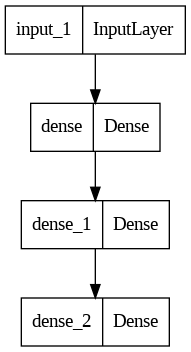

In [ ]:
plot_model(model)

#Model Training

In [ ]:
#Train
history = model.fit(X_train,Y_train,epochs=nb_epoch,batch_size=batch_size)


Epoch 1/10
469/469 [==============================] - 13s 25ms/step - loss: 2.1199 - accuracy: 0.3632
Epoch 2/10
469/469 [==============================] - 10s 21ms/step - loss: 1.7557 - accuracy: 0.6894
Epoch 3/10
469/469 [==============================] - 12s 26ms/step - loss: 1.4189 - accuracy: 0.7606
Epoch 4/10
469/469 [==============================] - 11s 23ms/step - loss: 1.1412 - accuracy: 0.7975
Epoch 5/10
469/469 [==============================] - 11s 23ms/step - loss: 0.9404 - accuracy: 0.8217
Epoch 6/10
469/469 [==============================] - 11s 23ms/step - loss: 0.8028 - accuracy: 0.8373
Epoch 7/10
469/469 [==============================] - 11s 23ms/step - loss: 0.7074 - accuracy: 0.8487
Epoch 8/10
469/469 [==============================] - 10s 21ms/step - loss: 0.6390 - accuracy: 0.8571
Epoch 9/10
469/469 [==============================] - 11s 23ms/step - loss: 0.5880 - accuracy: 0.8633
Epoch 10/10
469/469 [==============================] - 11s 23ms/step - loss: 0.548

#Inference on Test Data

In [ ]:
#Evaluate
evaluation = model.evaluate(X_test,Y_test)

#Display test statistics
print("summary: loss over the test dataset: %2f, Accuracy: %2f" % (evaluation[0]*100,evaluation[1]*100))

313/313 [==============================] - 3s 8ms/step - loss: 0.5084 - accuracy: 0.8786
summary: loss over the test dataset: 50.837606, Accuracy: 87.860000


<function matplotlib.pyplot.show(close=None, block=None)>

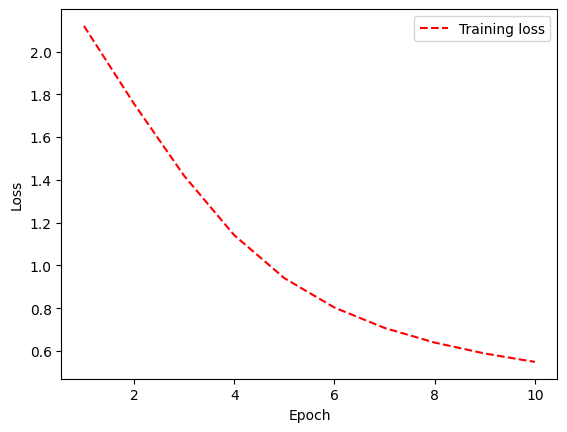

In [ ]:
#Get trainning loss histories
training_loss = history.history['loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss)+1)

#Visualize loss history
plt.plot(epoch_count,training_loss, 'r--')
plt.legend(['Training loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

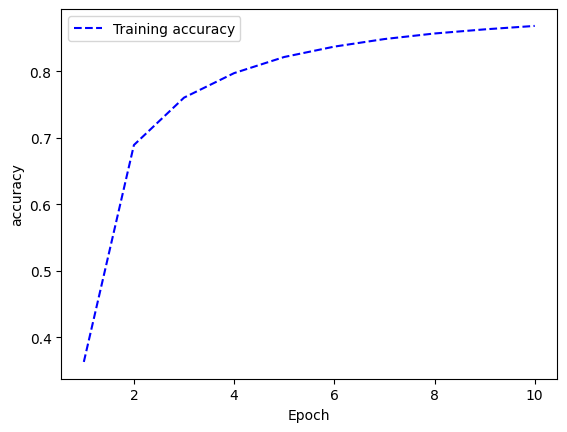

In [ ]:
#Get trainning Accuracy histories
training_accuracy = history.history['accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy)+1)

#Visualize loss history
plt.plot(epoch_count,training_accuracy, 'b--')
plt.legend(['Training accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show